<a href="https://colab.research.google.com/github/flanigra/Filipe_Lanigra/blob/master/Projeto_Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

<center><img alt="Analisando Airbnb" width="100%" src="https://as1.ftcdn.net/v2/jpg/01/08/38/90/1000_F_108389062_YPIq4MtEBigzASP5u2AWjIkyxOdS9VTX.jpg"></center>

Barcelona é uma das cidades mais charmosas da Espanha e um destino turístico muito procurado na Europa.

Capital da região autônoma da Catalunha, a cidade é famosa pelo futebol, moda, gastronomia e vida noturna, além de suas prais e monumentos históricos. Com seu clima mediterrâneo e temperaturas amenas, é possível desfrutar das belezas a atrações da cidade ao longo de todo o ano.

Desde 1992, quando sediou as Olimpíadas, o movimento de turistas em Barcelona cresceu consideravelmente e nesse contexto, com a chegada do Airbnb à cidade, cresceu também a locação de quartos privados dentro de imóveis catalãos, movimento que divide opniões dos moradores e autoridades em relação à presença dos visitantes nessas propriedades residenciais.

A partir de 2021, entrou em vigor uma nova regulamentação, proibindo a locação de quartos privados por curtas temporadas na cidade de Barcelona, porém ainda é permitida a locação de priopriedades inteiras que estejam devidamente registradas na prefeitura. Este número de registro deve ser disponibilizado nos anúncios em plataformas digitais como o Airbnb.

O [Airbnb](https://www.airbnb.com.br/) é uma das maiores plataformas de aluguel de curta temporada do mundo, está presenta no Brasil, na Espanha e em mais de 190 países, oferecendo hospedagens alternativas aos hotéis tradicionais, de maneira prática e segura, conectando anfitriões a turistas e permitindo a geração de renda extra para os primeiros, e uma experiência diferenciada e mais integrada à cidade, aos segundos.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2022-09-10/visualisations/listings.csv')

## Análise dos Dados


In [3]:
# Nomes das colunas/variáeis
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

**Dicionário das variáveis**

* id - número que identifica o imóvel
* name - nome da propriedade
* host_id - número que identifica o anfitrião da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - grandes Regiões da cidade
* neighbourhood - nome do bairro
* latitude - coordenada da latitude do imóvel
* longitude - coordenada da longitude do imóvel
* room_type - tipo de quarto oferecido na propriedade
* price - preço do aluguel do imóvel
* minimum_nights - número mínimo de noites aceito para aluguel do imóivel
* number_of_reviews - quantidade de avalições da propriedade
* last_review - data da última avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias disponíveis dentro de 1 ano - (365 dias)
* number_of_reviews_ltm - quantidade de avaliações do imóvel nos últimos 12 meses
* license - código de licença que permite a alocação do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# Identificar o volume de dados do DataFrame

print("Este dataset possui:")

print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset

df.loc[0:4]

Este dataset possui:
Entradas: 16920
Variáveis: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062


In [6]:
# Verificar o tipo de cada variável

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes

valores_nulos = (df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

display(valores_nulos)

license                           0.314894
reviews_per_month                 0.213593
last_review                       0.213593
name                              0.000591
host_name                         0.000118
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Neste dataset do Airbnb da cidade de Barcelona, temos uma quantidade considerável de valores ausentes para as variáveis license - 31,49%; reviews_per_month - 21,36% e last_review - 21,36%

Já para as vriáveis name e host_name, temos uma quantidade ínfima de valores ausentes, abaixo de 0,06%

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para auxílio na visualização da distribuição dos dados em cada variável, iremos plotar um histograma:

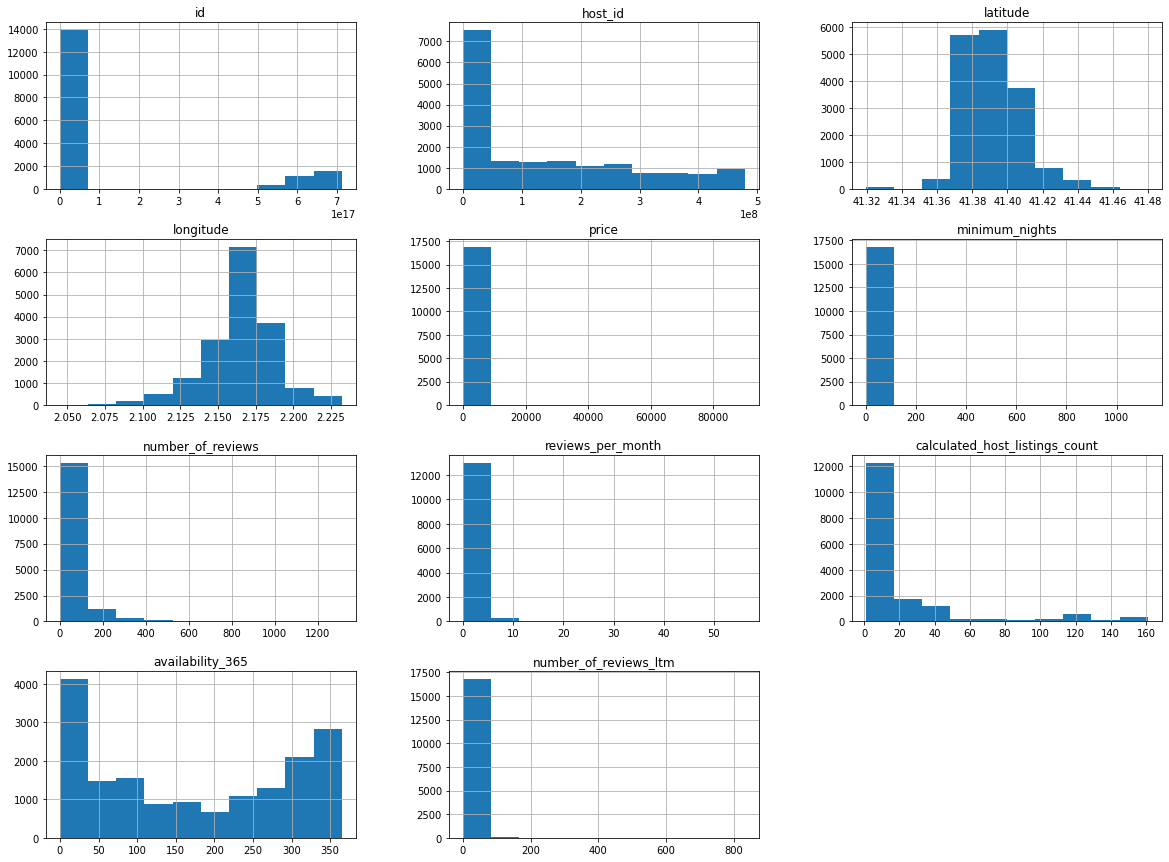

In [8]:
# Plotar o histograma das variáveis numéricas
df.hist(figsize=(20,15));

### **Q4. Há outliers presentes?**

A partir da distribuição de dados do histograma, é possível identificar valores que fogem da distribuição da maioria e que devem ser tratados a fim de garantirmos uma análise menos enviesada dos dados.

Para confirmar, há algumas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método describe()
*   Buscar estatisticamnte limites superiores e inferiores para as variáveis por meio do IQR Score
*   Plotar boxplots visualização dos dados das variáveis 




In [9]:
# Ver o resumo estatístico das variáveis numéricas:

df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16920.000000,16920.000000,16920.000000,13306.000000,16920.000000,16920.000000,16920.000000
mean,172.914775,13.270449,41.029137,1.415639,19.506619,170.815012,11.112234
std,927.545812,30.233280,77.338621,1.790187,35.142606,132.341829,21.965633
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,50.000000,1.000000,1.000000,0.250000,1.000000,39.000000,0.000000
50%,100.000000,3.000000,7.000000,0.890000,4.000000,164.000000,2.000000
75%,191.000000,31.000000,44.000000,2.030000,20.000000,308.000000,15.000000
max,90000.000000,1124.000000,1311.000000,56.130000,161.000000,365.000000,832.000000


Verificamos que o preço máximo é de 90.000, bem maior do que a mediana, que é de 100, o que puxa a média para cima, 173, demonstrando que esta não é a medida estatística mais fidedigna para avaliação da realidade do dataset.
Já o número máximo da variável de noites mínimas aceitas, é de 1124 noites, quantidade também fora da realidade, comparada a mediana, de 3 noites.

#### Limpando os outliers com a regra do IQR Score

O IQR Score é uma medida estatística definida como a subtração do Terceiro Quartil (75%) pelo Primeiro Quartil (25%)

In [10]:
# Definindo o IQR Score para a variável price
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
IQR_price = q3_price - q1_price
print("O valor do IQR para a variável price é de:",IQR_price)

# Definindo os limites inferior e superior para a variável price
limsup_price = q3_price + IQR_price * 1.5
liminf_price = q1_price - IQR_price * 1.5
print("O limite superior para a variável price é:", limsup_price)
print("O limite inferior para a variável price é:", liminf_price)

O valor do IQR para a variável price é de: 141.0
O limite superior para a variável price é: 402.5
O limite inferior para a variável price é: -161.5


In [11]:
# Definindo o IQR Score para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print(" O valor do IQR Score para a variável minimum_nights é de:",IQR_minimum_nights )

# Definindo os limites inferior e superior para a variável price
limsup_minimum_nights = q3_minimum_nights + IQR_minimum_nights * 1.5
liminf_minimum_nights = q1_minimum_nights - IQR_minimum_nights * 1.5
print("O limite superior para a variável minimum_nights é:", limsup_minimum_nights)
print("O limite inferior para a variável minimum_nights é:", liminf_minimum_nights)

 O valor do IQR Score para a variável minimum_nights é de: 30.0
O limite superior para a variável minimum_nights é: 76.0
O limite inferior para a variável minimum_nights é: -44.0


Como os limites inferiores são menores que zero, não iremos considerá-los na limpeza dos outliers

Vamos olhar como esses dados se ditribuem no Boxplot de cada uma dessas variáveis:

#### Boxplot para a variável price

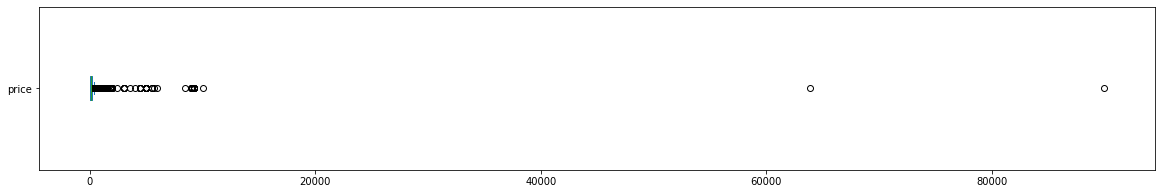

Temos 731 valores acima do limite superior
Isto representa 4.3203 % das entradas


In [12]:
df.price.plot(kind="box", vert = False, figsize = (20,3))
plt.show()

# Ver a quantidade da valores acima do limite superior, em relação ao total

valores_acima_price = len(df[df.price > limsup_price ])
total = df.shape[0]

print("Temos {} valores acima do limite superior".format(valores_acima_price))
print("Isto representa {:.4f} % das entradas".format((valores_acima_price/total)*100))

#### Boxplot para a variável minimun_nigths

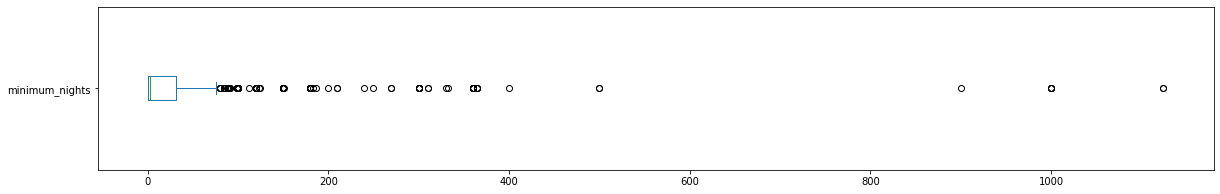

Temos 196 valores acima do limite superior
Isto representa 1.1584 % das entradas


In [13]:
# Plotar o Boxplot

df.minimum_nights.plot(kind="box", vert = False, figsize = (20,3))
plt.show()

# Ver a quantidade da valores acima do limite superior, em relação ao total

valores_acima_minimum_nights = len(df[df.minimum_nights > limsup_minimum_nights])
total = df.shape[0]

print("Temos {} valores acima do limite superior".format(valores_acima_minimum_nights))
print("Isto representa {:.4f} % das entradas".format((valores_acima_minimum_nights/total)*100))

#### Histogramas sem outliers

In [14]:
# Limpando os outliers

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > limsup_price].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df.minimum_nights > limsup_minimum_nights].index, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [15]:
# Retirando as entradas com variável price = zero

price_zero = len(df[df.price== 0])
price_zero
print ("Temos {} entradas com price = zero".format(price_zero))

df_clean.drop(df_clean[df.price == 0].index, axis = 0, inplace = True)

Temos 1 entradas com price = zero


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [16]:
# Verificando o novo tamanho do dataset limpo
df_clean.shape

(16003, 18)

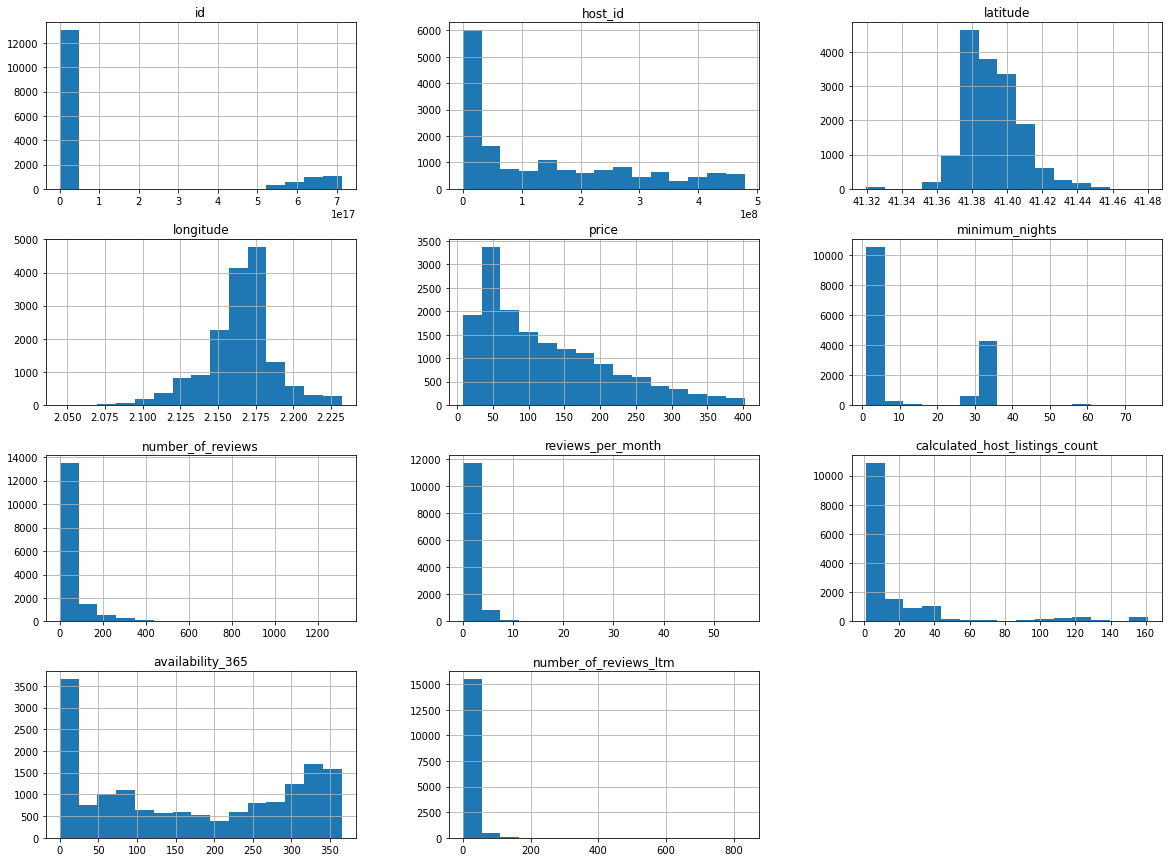

In [17]:
# Plotando os histogramas com o dataset limpo
df_clean.hist(bins = 15, figsize = (20,15));

Agoar, com o dataset limpo, podemos ver mais claramente a distribução das variáveis price e minimum_nights

### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [18]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# Mostrar a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.356745,0.134388,0.094364,0.283128,0.271018
minimum_nights,-0.356745,1.000000,-0.183775,-0.221033,0.017286,0.065559
number_of_reviews,0.134388,-0.183775,1.000000,0.474984,-0.107704,0.058587
reviews_per_month,0.094364,-0.221033,0.474984,1.000000,-0.089762,0.146096
calculated_host_listings_count,0.283128,0.017286,-0.107704,-0.089762,1.000000,0.132668
availability_365,0.271018,0.065559,0.058587,0.146096,0.132668,1.000000


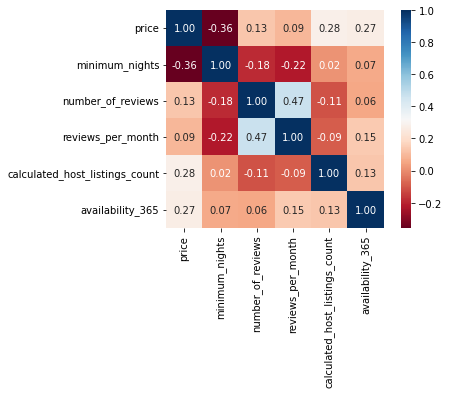

In [19]:
# Plotar um heatmap a partir das correlações

sns.heatmap (corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

### **Q6. Qual o tipo de imóvel mais disponível para locação Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [20]:
# Mostrar a quantidade de cada tipo de imóvel disponível baseado na variável room_type
df_clean.room_type.value_counts()

Entire home/apt    9408
Private room       6275
Shared room         171
Hotel room          149
Name: room_type, dtype: int64

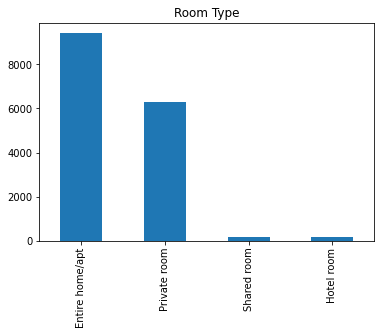

In [21]:
# Plotando gráfico de barras simples para visualização da variável room_type
df_clean.room_type.value_counts().plot(kind='bar', title = "Room Type");

In [22]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.587890
Private room       0.392114
Shared room        0.010685
Hotel room         0.009311
Name: room_type, dtype: float64

Podemos observar que mais da metade das entradas são de imóves inteiros, porém, quase 40% são de quartos privados, um tipo de negócio que está fora da regulamentação da cidade de Barcelona

### **Q7. Qual a localidade mais cara de Barcelona?**



Para verificar qual o bairro com o maior valor médio do preço de locação dos imóveis, podemos agrupar nosso dataset limpo por bairros (*neighbourhoods*) e compará-los em função do preço de locação (*price*)

In [23]:
# Ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)


neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    174.500000
la Dreta de l'Eixample                          173.372647
la Vila Olímpica del Poblenou                   166.969697
l'Antiga Esquerra de l'Eixample                 153.290798
Sant Antoni                                     143.816864
                                                   ...    
la Guineueta                                     46.727273
Verdun                                           42.200000
la Prosperitat                                   42.150000
el Turó de la Peira                              30.480000
la Clota                                         25.000000
Name: price, Length: 73, dtype: float64

In [24]:
# Ver os bairros por zonas ou distritos, na média, do maior para o menor valor
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending = False)

neighbourhood_group
Eixample               151.844750
Sarrià-Sant Gervasi    127.769565
Sant Martí             125.040230
Gràcia                 118.112974
Ciutat Vella           107.616303
Sants-Montjuïc         105.221299
Les Corts              105.097629
Horta-Guinardó          83.462085
Sant Andreu             70.602305
Nou Barris              55.039106
Name: price, dtype: float64

In [25]:
# Avaliando se a quantidade de dados dos dois bairros mais caros é significativa

len(df_clean[df_clean.neighbourhood == 'Diagonal Mar i el Front Marítim del Poblenou' ])


120

In [26]:
len(df_clean[df_clean.neighbourhood == "la Dreta de l'Eixample" ])

1806

Dessa forma, podemos concluir que os 2 bairros mais caros da cidade de Barcelona são *Diagonal Mar i el Front Marítim del Poblenou* e *la Dreta de l'Eixample*, pois têm as maiores médias de preço e também têm uma quantidade considerável de imóveis, o que torna o valor mais confiável, já que os outliers já foram removidos

Para quem não está familiarizado à cidade, fazendo uma pesquisa rápida, descobrimos que a região de Eixample é uma das mais nobres da cidade, central e próxima a vários pontos turpisticos, é bem famosa entre os viajantes

Por outro lado, *Diagonal Mar i el Front Marítim del Poblenou* é um bairro planejado, e um dos mais modernos, o que explica o alto valor das acomodações.

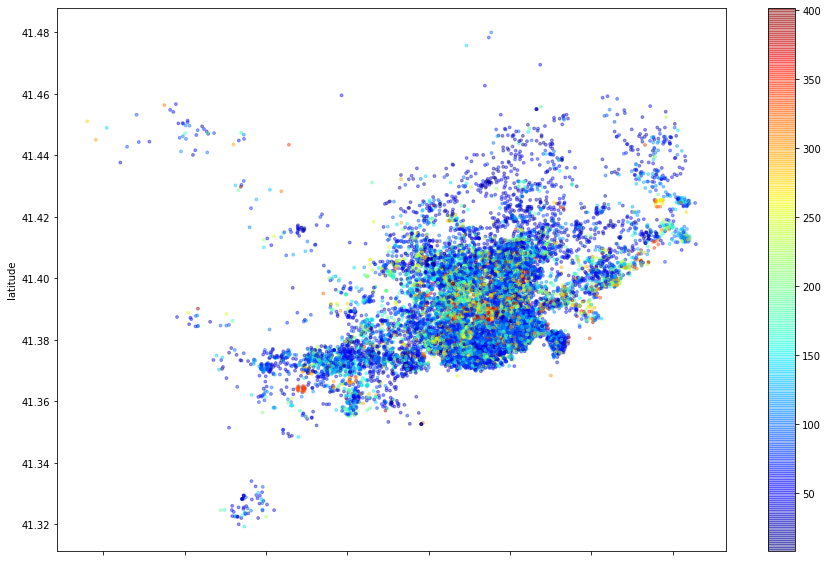

In [27]:
# Plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,10));

## Conclusões


A partir de uma análise superficial dos dados resumidos do Airbnb referentes a cidade de Barcelona, pudemos verificar a presença de alguns valores outliers, principalmente nas variáveis price e minimum_nights.

A partir do tratamento e exclusão das entradas com esses valores, pudemos avaliar um conjunto de dados com menor viés e concluirmos que os bairros mais caros de Barcelona na plataforma Airbnb são *Diagonal Mar i el Front Marítim del Poblenou* e *la Dreta de l'Eixample*, com as maiores médias de preços de locação.

Verificamos ainda, que apesar da regulamentação de 2021 proibindo a locação de quartos privados na cidade de Barcelona, cerca de 40% das propridades disponíveis na plataforma Airbnb ainda são deste tipo de locação, indicando talvez que estas regras precisam ser revistas e flexibilizadas pensando no cenário de crescimento da cultura de compartilhamento (carros, imóveis, eletrodomésticos, etc) e provavelmente a fiscalização seja ineficiente.

Para uma análise mais detalhada, recomenda-se o uso do dataset completo, com mais de 100 atributos